In [6]:
import requests
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np 

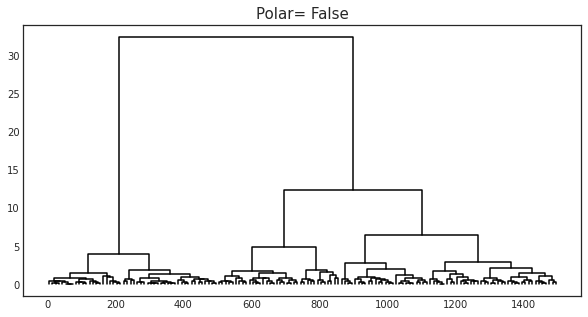

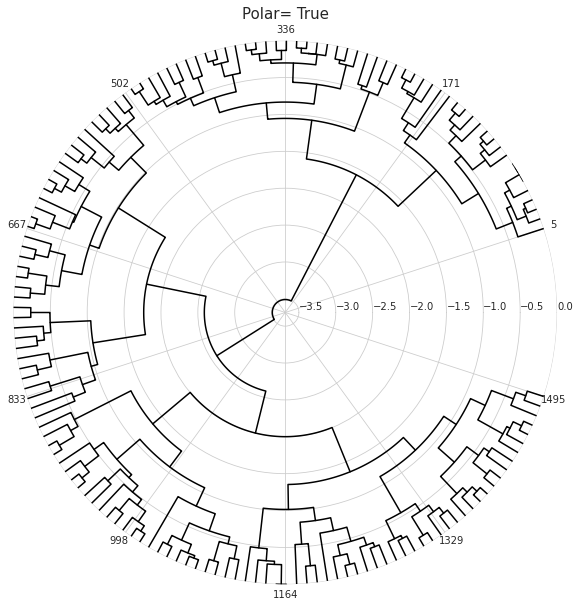

In [14]:
def read_url(url):
    r = requests.get(url)
    return r.text

def cartesian_to_polar(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def plot_dendrogram(icoord,dcoord,figsize, polar=False):
    if polar:
        dcoord = -np.log(dcoord+1)
        # avoid a wedge over the radial labels
        gap = 0.1
        imax = icoord.max()
        imin = icoord.min()
        icoord = ((icoord - imin)/(imax - imin)*(1-gap) + gap/2)*2*np.pi
    with plt.style.context("seaborn-white"):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, polar=polar)
        for xs, ys in zip(icoord, dcoord):
            if polar:
                xs = smoothsegment(xs)
                ys = smoothsegment(ys)
            ax.plot(xs,ys, color="black")
        ax.set_title(f"Polar= {polar}", fontsize=15)
        if polar:
            ax.spines['polar'].set_visible(False)
            ax.set_rlabel_position(0)
            Nxticks = 10
            xticks = np.linspace(gap/2, 1-gap/2, Nxticks)
            ax.set_xticks(xticks*np.pi*2)
            ax.set_xticklabels(np.round(np.linspace(imin, imax, Nxticks)).astype(int))
            
# Load the dendrogram data
string_data = read_url("https://pastebin.com/raw/f953qgdr").replace("\r","").replace("\n","").replace("\u200b\u200b","")

# Convert it to a dictionary (a subset of the output from scipy.hierarchy.dendrogram)
dendrogram_data = literal_eval(string_data)
icoord = np.asarray(dendrogram_data["icoord"], dtype=float)
dcoord = np.asarray(dendrogram_data["dcoord"], dtype=float)

# Plot the cartesian version
plot_dendrogram(icoord,dcoord, figsize=(10,5), polar=False)

# Plot the polar version
plot_dendrogram(icoord,dcoord, figsize=(10,10), polar=True)